In [2]:
import sys
import numpy as np
import torch
sys.path.append("../")  
import src.RBM as rbm

In [3]:
visible_dim = 327736 
hidden_dim = 1000 
sigma = 0.1
RBM =  rbm.GaussianBinaryRBM(visible_dim, hidden_dim, sigma)

In [4]:
print(RBM)

GaussianBinaryRBM()


In [5]:
v0 = np.random.uniform(-1, 1, visible_dim)
v0 = torch.tensor(v0, dtype=torch.float32)

In [6]:
import matplotlib.pyplot as plt
def plot_erreur(epoch, error):
    """" Tracer la courbe d'évolution de l'erreur """
    
    plt.plot(range(epoch), error, label="Erreur de reconstruction")
    plt.xlabel("Époque")
    plt.ylabel("Erreur")
    plt.title("Évolution de l'erreur de reconstruction")
    plt.legend()
    plt.show()

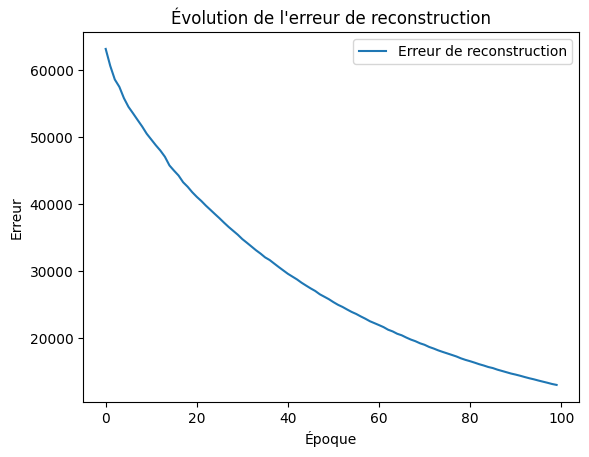

In [8]:
epoch = 100
error = []
for _ in range(epoch):
    RBM.contrastive_divergence(v0)
    v_pred = RBM.forward(v0)
    error.append(((v0 - v_pred) ** 2).sum().item())  # Erreur quadratique
    
plot_erreur(epoch, error)
